In [1]:
!pip install kagglehub pandas seaborn scikit-learn matplotlib

In [2]:
import kagglehub

# Downloading the dataset from Kaggle
path = kagglehub.dataset_download("adithiav/credit-risk")

print("Path to dataset files:", path)


100%|██████████| 699M/699M [00:09<00:00, 79.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/adithiav/credit-risk/versions/1


In [5]:
import os

# List all files under the downloaded dataset directory
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))


/root/.cache/kagglehub/datasets/adithiav/credit-risk/versions/1/data_samples/bureau_sample.csv
/root/.cache/kagglehub/datasets/adithiav/credit-risk/versions/1/data_samples/bureau_balance_sample.csv
/root/.cache/kagglehub/datasets/adithiav/credit-risk/versions/1/data_samples/pos_cash_balance_sample.csv
/root/.cache/kagglehub/datasets/adithiav/credit-risk/versions/1/data_samples/installments_payments_sample.csv
/root/.cache/kagglehub/datasets/adithiav/credit-risk/versions/1/data_samples/previous_application_sample.csv
/root/.cache/kagglehub/datasets/adithiav/credit-risk/versions/1/data_samples/application_sample.csv
/root/.cache/kagglehub/datasets/adithiav/credit-risk/versions/1/data_samples/credit_card_balance_sample.csv
/root/.cache/kagglehub/datasets/adithiav/credit-risk/versions/1/data_final/previous_application.csv
/root/.cache/kagglehub/datasets/adithiav/credit-risk/versions/1/data_final/credit_card_balance.csv
/root/.cache/kagglehub/datasets/adithiav/credit-risk/versions/1/data_fi

In [6]:
import pandas as pd

# Load the main application data
data = pd.read_csv("/root/.cache/kagglehub/datasets/adithiav/credit-risk/versions/1/data_final/application.csv")

# Basic overview
print("Shape:", data.shape)
print("Columns:", data.columns.tolist())
print("\nFirst 5 Rows:")
print(data.head())


Shape: (307511, 123)
Columns: ['Unnamed: 0', 'SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG

In [13]:
# Check total missing values in each column
missing = data.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Columns with missing values:\n", missing)

# Fill numeric columns with median
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Fill categorical columns with mode (no inplace assignment)
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode_val = data[col].mode()[0]
    data[col] = data[col].fillna(mode_val)


Columns with missing values:
 Series([], dtype: int64)


In [15]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Encode categorical variables
data_enc = data.copy()
for col in data_enc.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_enc[col] = le.fit_transform(data_enc[col])

# Define features and target
X = data_enc.drop('TARGET', axis=1)
y = data_enc['TARGET']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train the model
clf = LogisticRegression(max_iter=2000, class_weight='balanced')
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Default', 'Default'], zero_division=0))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.58

Classification Report:
              precision    recall  f1-score   support

  No Default       0.95      0.58      0.72     56538
     Default       0.11      0.62      0.19      4965

    accuracy                           0.58     61503
   macro avg       0.53      0.60      0.46     61503
weighted avg       0.88      0.58      0.68     61503


Confusion Matrix:
[[32897 23641]
 [ 1910  3055]]


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create pipeline with scaler and logistic regression
clf = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=2000, class_weight='balanced', solver='liblinear')
)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate performance
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Default', 'Default'], zero_division=0))


Accuracy: 0.69

Confusion Matrix:
 [[39021 17517]
 [ 1626  3339]]

Classification Report:
              precision    recall  f1-score   support

  No Default       0.96      0.69      0.80     56538
     Default       0.16      0.67      0.26      4965

    accuracy                           0.69     61503
   macro avg       0.56      0.68      0.53     61503
weighted avg       0.90      0.69      0.76     61503



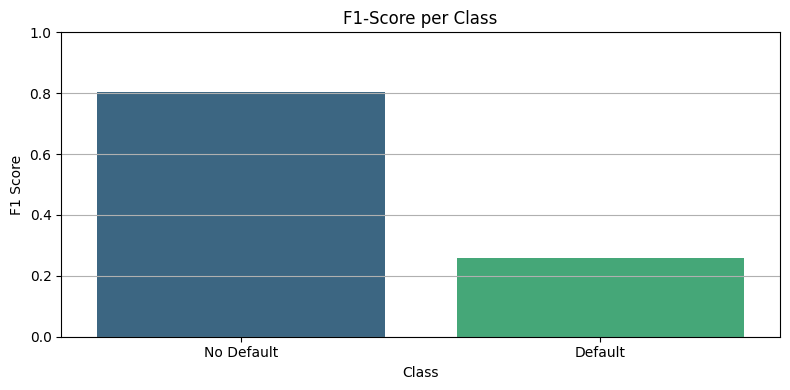

Classification Report:


,precision,recall,f1-score,support
No Default,0.96,0.69,0.80,56538.00
Default,0.16,0.67,0.26,4965.00
accuracy,0.69,0.69,0.69,0.69
macro avg,0.56,0.68,0.53,61503.00
weighted avg,0.90,0.69,0.76,61503.00


In [19]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate classification report dictionary (suppress warnings)
report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Default', 'Default'], zero_division=0)

# Convert to DataFrame
report_df = pd.DataFrame(report).transpose()

# Prepare a new DataFrame for plotting (excluding avg/total rows)
f1_data = report_df.iloc[:-3].reset_index().rename(columns={'index': 'Class', 'f1-score': 'F1 Score'})

# Plot F1-scores using `hue`
plt.figure(figsize=(8, 4))
sns.barplot(data=f1_data, x='Class', y='F1 Score', hue='Class', palette='viridis', legend=False)
plt.title('F1-Score per Class')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Display the full classification report table
print("Classification Report:")
display(report_df.round(2))
